In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder

features = ["buying","maint","doors","persons","lug_boot","safety","class"]
df_data = pd.read_csv("C:/Users/a/Downloads/car.data")
df_data = df_data.to_numpy()
df = pd.DataFrame(df_data, columns=features)
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [9]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

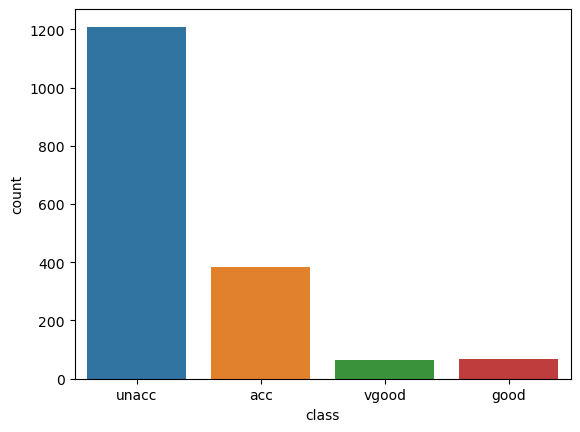

In [10]:
sns.countplot(data=df,x="class" )

In [11]:
le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])
    
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [13]:
X = df.drop('class', axis=1)

In [14]:
y = df['class']

In [15]:
Y = pd.get_dummies(y).values

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(40,input_shape=(6,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(Adam(lr=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 40)                280       
                                                                 
 dense_5 (Dense)             (None, 30)                1230      
                                                                 
 dense_6 (Dense)             (None, 20)                620       
                                                                 
 dense_7 (Dense)             (None, 4)                 84        
                                                                 
Total params: 2,214
Trainable params: 2,214
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
44/44 [==============================] - 2s 14ms/step - loss: 0.3418 - accuracy: 0.6959 - val_loss: 0.2834 - val_accuracy: 0.6908
Epoch 2/100
44/44 [==============================] - 0s 5ms/step - loss: 0.2503 - accuracy: 0.7632 - val_loss: 0.2218 - val_accuracy: 0.7514
Epoch 3/100
44/44 [==============================] - 0s 5ms/step - loss: 0.2154 - accuracy: 0.7748 - val_loss: 0.2094 - val_accuracy: 0.7717
Epoch 4/100
44/44 [==============================] - 0s 5ms/step - loss: 0.1873 - accuracy: 0.8168 - val_loss: 0.1896 - val_accuracy: 0.8006
Epoch 5/100
44/44 [==============================] - 0s 4ms/step - loss: 0.1784 - accuracy: 0.8335 - val_loss: 0.1982 - val_accuracy: 0.8064
Epoch 6/100
44/44 [==============================] - 0s 4ms/step - loss: 0.1586 - accuracy: 0.8458 - val_loss: 0.2063 - val_accuracy: 0.8150
Epoch 7/100
44/44 [==============================] - 0s 4ms/step - loss: 0.1481 - accuracy: 0.8602 - val_loss: 0.1727 - val_accuracy: 0.8439
Epoch 8/100


In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88        77
           1       0.56      0.36      0.43        14
           2       1.00      0.98      0.99       239
           3       1.00      0.94      0.97        16

    accuracy                           0.95       346
   macro avg       0.85      0.80      0.82       346
weighted avg       0.94      0.95      0.94       346

[[ 72   4   1   0]
 [  9   5   0   0]
 [  4   0 235   0]
 [  1   0   0  15]]


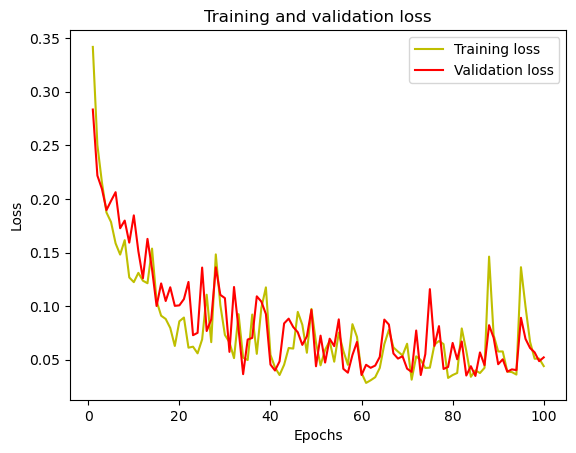

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

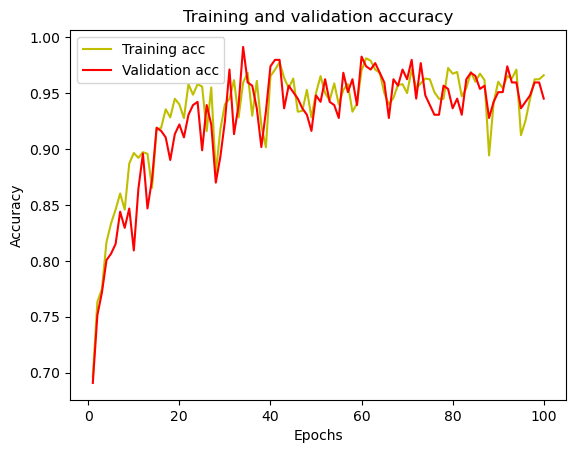

In [21]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()